# Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Library documentation: <a>http://stanford.edu/~mwaskom/software/seaborn/</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Themes

In [2]:
# global config settings to control things like style, font size, color palette etc.
sb.set(context="notebook", style="darkgrid", palette="dark")

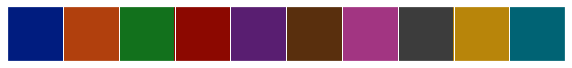

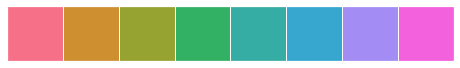

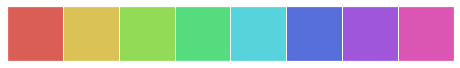

In [3]:
# seaborn has some nice built-in color palette features
sb.palplot(sb.color_palette())
sb.palplot(sb.color_palette("husl", 8))
sb.palplot(sb.color_palette("hls", 8))

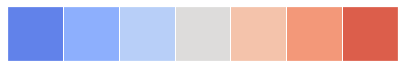

In [4]:
# matplotlib colormap of evenly spaced colors
sb.palplot(sb.color_palette("coolwarm", 7))

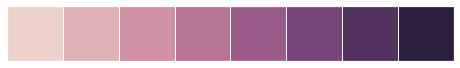

In [5]:
# sequential palette with linear increase in brightness
sb.palplot(sb.cubehelix_palette(8))

### Advanced Plots

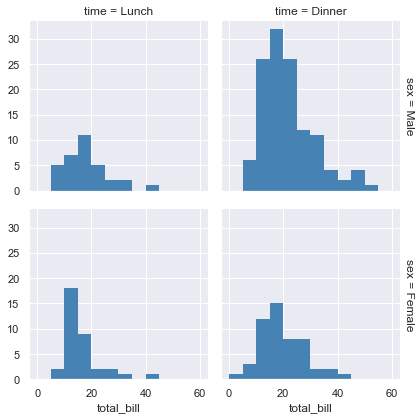

In [8]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

tips = sb.load_dataset("tips")
g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

C:\Users\philt\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\philt\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\philt\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\philt\Anaconda3\lib\site-packages\seab

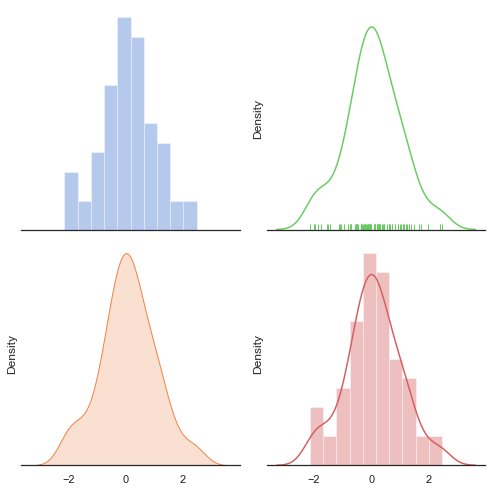

In [9]:
# several distribution plot examples
sb.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

rs = np.random.RandomState(10)

b, g, r, p = sb.color_palette("muted", 4)

d = rs.normal(size=100)

sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sb.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sb.distplot(d, color=p, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

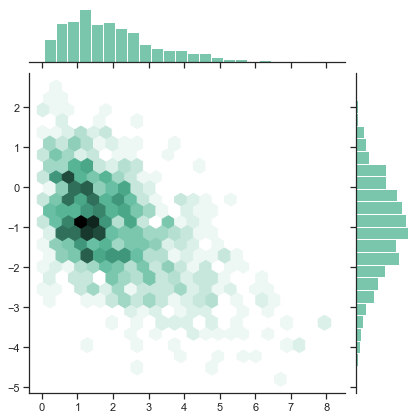

In [12]:
# hexbin plot with marginal distributions
from scipy.stats import kendalltau
sb.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
sb.jointplot(x=x, y=y, kind="hex", color="#4CB391")

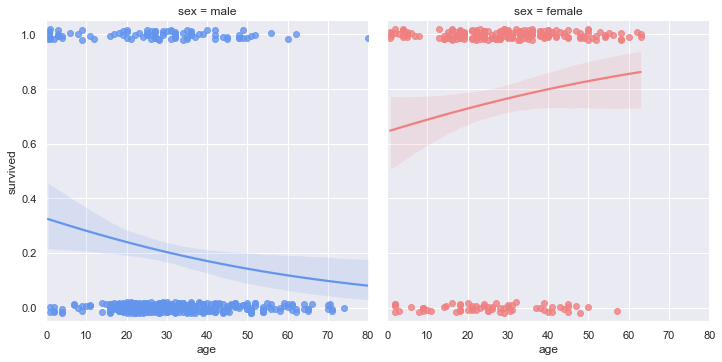

In [15]:
# faceted logistic regression
sb.set(style="darkgrid")
df = sb.load_dataset("titanic")

pal = dict(male="#6495ED", female="#F08080")
g = sb.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

C:\Users\philt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


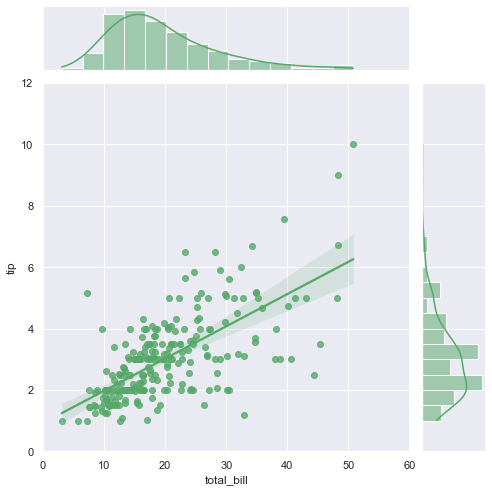

In [16]:
# linear regression with marginal distributions
sb.set(style="darkgrid")
tips = sb.load_dataset("tips")
color = sb.color_palette()[2]
g = sb.jointplot(x="total_bill", y="tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, size=7)

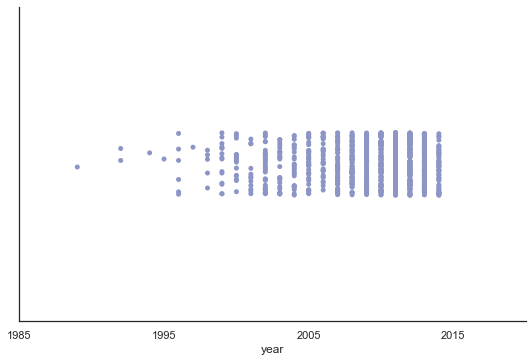

In [20]:
# time series factor plot
sb.set(style="white")
planets = sb.load_dataset("planets")
years = np.arange(2000, 2015)
g = sb.catplot(x="year", data=planets, palette="BuPu",
                   aspect=1.5)
g.set_xticklabels(step=2)

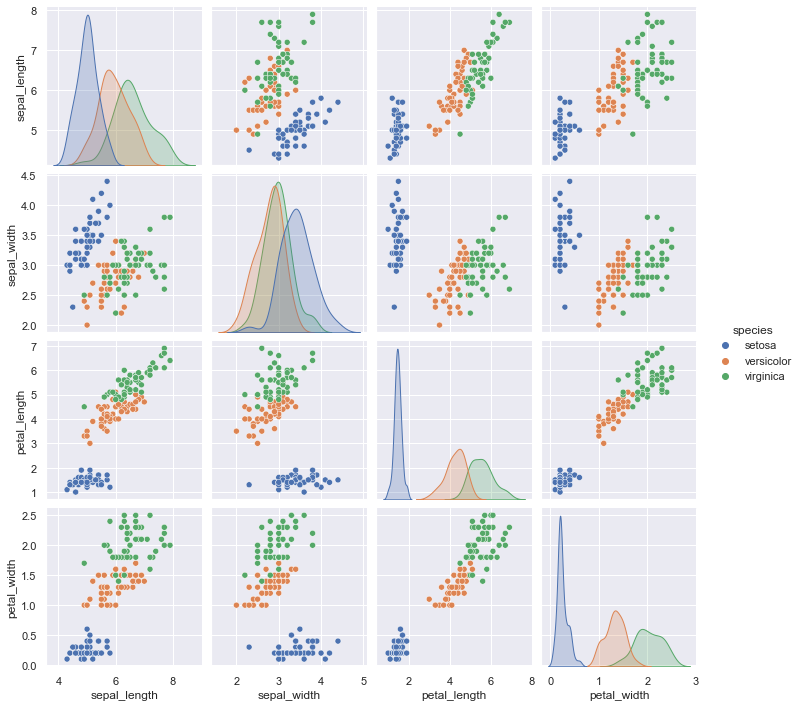

In [24]:
# pair plot example
sb.set(style="darkgrid")
df = sb.load_dataset("iris")
sb.pairplot(df, hue="species", height=2.5)